In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Datasets/Week 6 data/weatherHistory.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

In [6]:
data['Formatted Date'].dtype

dtype('O')

In [7]:
x = data['Formatted Date']

In [8]:
data['Date'] = data['Formatted Date'].apply(lambda x : x.strftime("%x"))
data['Time'] = data['Formatted Date'].apply(lambda x : x.strftime("%T"))

data.drop(['Formatted Date'],axis = 1, inplace = True)

In [9]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,04/01/06,00:00:00
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,04/01/06,01:00:00
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,04/01/06,02:00:00
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,04/01/06,03:00:00
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,04/01/06,04:00:00


In [10]:
lis = []
cols = data.columns
for i in cols:
    if data[i].dtype == 'O':
        lis.append(i)

In [11]:
for i in lis:
    print(i.upper())
    print(data[i].value_counts())
    print('Unique data present in the column are : {}'.format(len(data[i].unique())))
    print('-'*100)
    print('-'*100)

SUMMARY
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [12]:
data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Date                          0
Time                          0
dtype: int64

In [13]:
data['Precip Type'] = data.fillna(data['Precip Type'].mode())

In [14]:
data.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Date                        0
Time                        0
dtype: int64

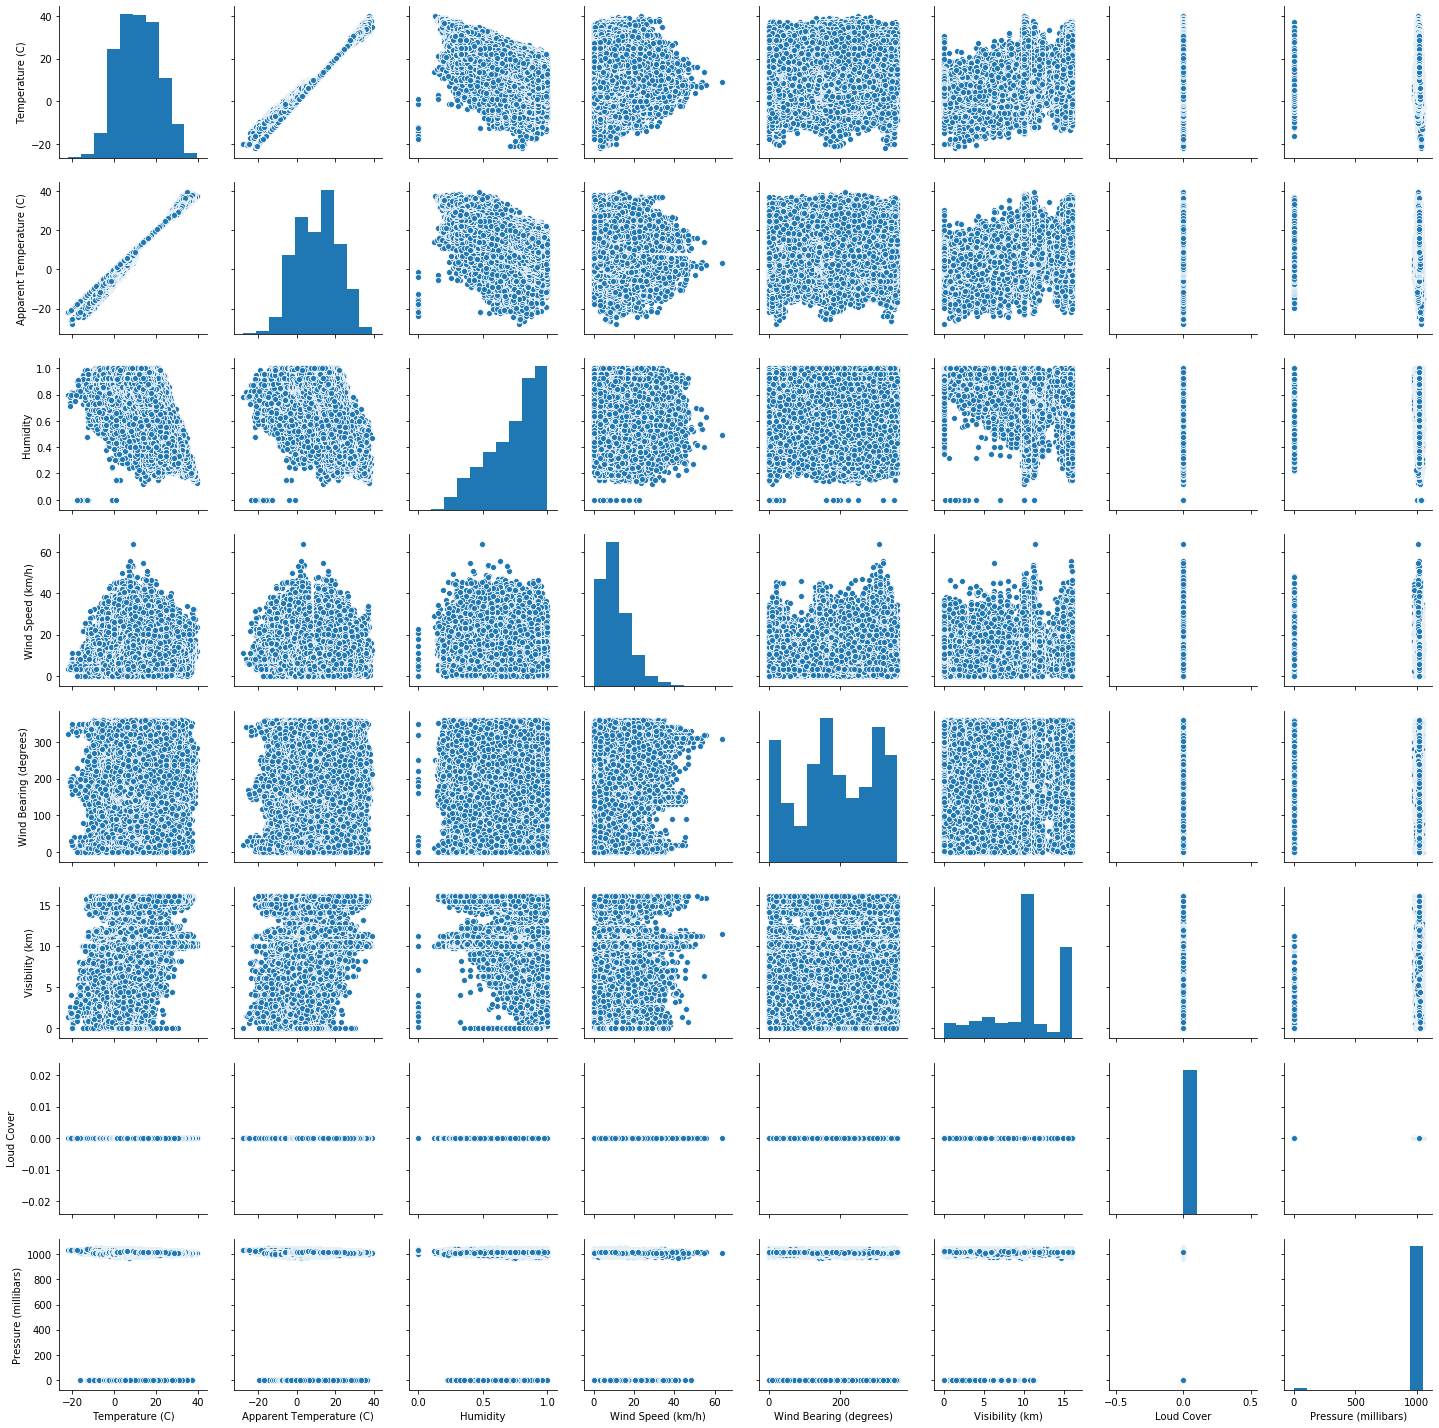

In [116]:
sea.pairplot(data)

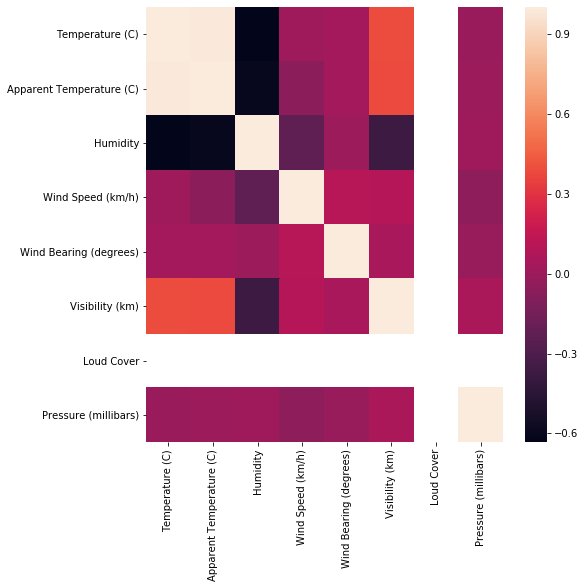

In [15]:
plt.figure(figsize = (8,8))
sea.heatmap(data.corr())

In [16]:
data.drop(['Loud Cover'], axis = 1, inplace = True)
data.drop(['Humidity'], axis = 1, inplace = True)

In [17]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,Time
0,Partly Cloudy,Partly Cloudy,9.472222,7.388889,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,04/01/06,00:00:00
1,Partly Cloudy,Partly Cloudy,9.355556,7.227778,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,04/01/06,01:00:00
2,Mostly Cloudy,Mostly Cloudy,9.377778,9.377778,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,04/01/06,02:00:00
3,Partly Cloudy,Partly Cloudy,8.288889,5.944444,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,04/01/06,03:00:00
4,Mostly Cloudy,Mostly Cloudy,8.755556,6.977778,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,04/01/06,04:00:00


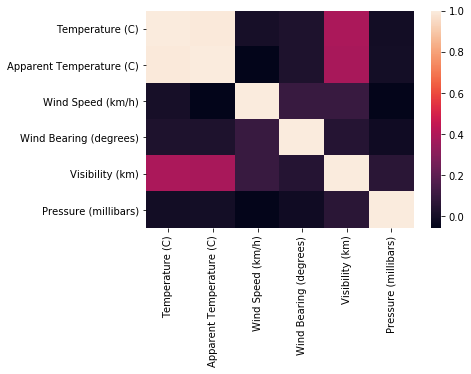

In [18]:
sea.heatmap(data.corr())

In [19]:
data.corr()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.056650,0.029031,0.381718,-0.000219
Wind Speed (km/h),0.008957,-0.056650,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,-0.049263,-0.011651,0.059818,1.000000


In [20]:
cols = cols.to_list()

In [21]:
cols

['Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary',
 'Date',
 'Time']

In [22]:
new_cols = ['Summary',
            'Precip Type',
            'Wind Speed (km/h)',
            'Wind Bearing (degrees)',
            'Visibility (km)',
            'Pressure (millibars)',
            'Daily Summary',
            'Date',
            'Time',
            'Temperature (C)',
            'Apparent Temperature (C)']

In [23]:
data = data[new_cols]

In [24]:
data.drop(['Summary','Precip Type','Daily Summary','Time','Pressure (millibars)','Wind Bearing (degrees)','Wind Speed (km/h)','Date','Temperature (C)'], axis = 1, inplace = True)

In [25]:
X_train, y_train, X_test, y_test = (data.iloc[:70000,:1], data.iloc[:70000,1:], data.iloc[70000:,:1], data.iloc[70000:,1:])

In [26]:
data.head()

,Visibility (km),Apparent Temperature (C)
0,15.8263,7.388889
1,15.8263,7.227778
2,14.9569,9.377778
3,15.8263,5.944444
4,15.8263,6.977778


In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 1)
(70000, 1)
(26453, 1)
(26453, 1)


In [30]:
def grad_desc(x,y):
    b0 = 1
    b1 = 0
    m = len(x)
    epochs = 1000
    learning_rate = 0.0001
    
    for i in range(epochs):
        y_pred = b0 + b1 * x
        cost = (1 / (2 * m)) * sum([val**2 for val in (y_pred - y)])
        b0_d = (1 / m) * sum(y_pred - y)
        b1_d = (1 / m) * (sum((y_pred - y) * x))
        b0 = b0 - (learning_rate * b0_d)
        b1 = b1 - (learning_rate * b1_d)     
        #print('b0 {},b1 {},iteration {},cost {}'.format(cost))
        print(cost)
    return b0,b1    

In [31]:
grad_desc(X_train.values,y_train.values)

[106.90762667]
[105.64249459]
[104.40675146]
[103.19971457]
[102.02071708]
[100.86910763]
[99.74425]
[98.64552275]
[97.57231887]
[96.52404546]
[95.50012337]
[94.49998694]
[93.52308362]
[92.5688737]
[91.63683003]
[90.72643767]
[89.83719368]
[88.96860677]
[88.12019708]
[87.29149591]
[86.48204541]
[85.69139839]
[84.91911806]
[84.16477776]
[83.42796074]
[82.70825993]
[82.00527773]
[81.31862576]
[80.64792468]
[79.99280394]
[79.35290162]
[78.72786419]
[78.11734634]
[77.52101078]
[76.93852806]
[76.36957638]
[75.81384141]
[75.27101613]
[74.74080065]
[74.22290204]
[73.71703418]
[73.2229176]
[72.74027932]
[72.26885269]
[71.80837728]
[71.35859868]
[70.9192684]
[70.49014374]
[70.07098762]
[69.66156847]
[69.2616601]
[68.87104157]
[68.48949709]
[68.11681586]
[67.75279199]
[67.39722437]
[67.04991656]
[66.71067669]
[66.37931734]
[66.05565544]
[65.73951219]
[65.43071293]
[65.12908704]
[64.83446791]
[64.54669276]
[64.26560261]
[63.99104216]
[63.72285973]
[63.46090715]
[63.20503972]
[62.95511607]
[62.710

[52.44630914]
[52.4463077]
[52.44630629]
[52.44630491]
[52.44630356]
[52.44630223]
[52.44630093]
[52.44629965]
[52.4462984]
[52.44629717]
[52.44629597]
[52.44629479]
[52.44629363]
[52.4462925]
[52.44629139]
[52.44629029]
[52.44628922]
[52.44628817]
[52.44628714]
[52.44628612]
[52.44628513]
[52.44628415]
[52.44628319]
[52.44628225]
[52.44628133]
[52.44628042]
[52.44627953]
[52.44627865]
[52.44627779]
[52.44627695]
[52.44627612]
[52.44627531]
[52.4462745]
[52.44627372]
[52.44627294]
[52.44627218]
[52.44627143]
[52.4462707]
[52.44626998]
[52.44626926]
[52.44626857]
[52.44626788]
[52.4462672]
[52.44626653]
[52.44626588]
[52.44626523]
[52.4462646]
[52.44626398]
[52.44626336]
[52.44626275]
[52.44626216]
[52.44626157]
[52.44626099]
[52.44626042]
[52.44625986]
[52.44625931]
[52.44625876]
[52.44625823]
[52.4462577]
[52.44625717]
[52.44625666]
[52.44625615]
[52.44625565]
[52.44625516]
[52.44625467]
[52.44625419]
[52.44625371]
[52.44625325]
[52.44625278]
[52.44625233]
[52.44625188]
[52.44625143]


(array([1.07876531]), array([0.9623412]))

In [37]:
def predict(test):
    b0 = 1.54998348
    b1 = 0.92214154
    n = len(test)
    
    lis = []
    for i in range(n):
        y_pred = b0 + b1 * test[i]
        lis.append(y_pred)
    return lis

In [38]:
y_pred = predict(X_test.values)

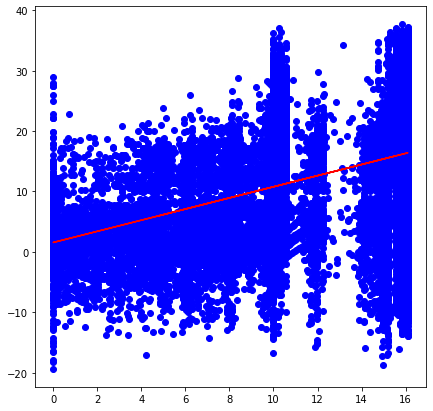

In [39]:
plt.figure(figsize = (7,7))
plt.scatter(X_test, y_test, c = 'b', marker = 'o')
plt.plot(X_test, y_pred, c = 'r')
plt.show()

In [41]:
rmse = np.sqrt(sum([val**2 for val in (y_pred - y_test.values)]) / len(y_test))
print('Root mean squared error is : {}'.format(rmse))

Root mean squared error is : [8.89000314]


# Finding Regression line using matrix

In [42]:
theta = np.linalg.inv(np.dot(X_train.T, X_train)) * np.dot(X_train.T, y_train)

In [43]:
Y_pred = X_test.dot(theta)

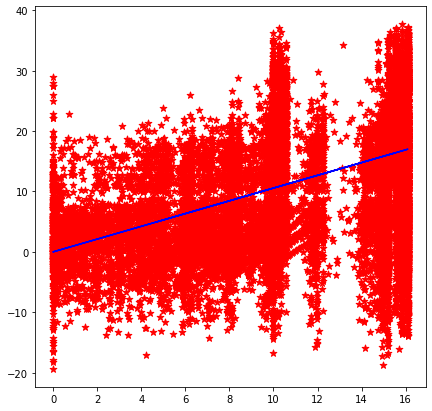

In [44]:
plt.figure(figsize = (7,7))
plt.scatter(x = X_test, y = y_test, s = 50, c = 'r', marker = '*')
plt.plot(X_test, Y_pred, c = 'b')

In [45]:
rmse = np.sqrt(sum([val**2 for val in (Y_pred.values - y_test.values)]) / len(y_test))
print('Root mean squared error is : {}'.format(rmse))

Root mean squared error is : [8.89632818]
